# Phase 1: Loading Data & Pre-process MRI Images

**Name: Shreya Das**

In this phase we are going to load the image dataset from Kaggle. You can find the dataset here: https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images. This dataset contains MRI images of normal and tumored brains. Our goal is to create a MRI Image Analyzer using a CNN (Convolutional Neural Network) that can classify these images into 2 different classes. 

## 0 Creating a virtual environment
We are going to use a virtual environment to install all the dependencies required for this project.

In [81]:
# Creates a new virtual environment called env
#!python -m venv env

In [82]:
# We are going to activate the virtual environment for the project
#!source env/bin/activate

Our virtual environment should be up an running. You can check this in terminal. You should see (env) in the command line now.

## 1.1 Installing Dependencies and Setup
We install tensorflow and tensorflow-gpu to use keras API to sort the images into the 2 classes. open-cv is going to allow to remove images that are dodgy and then matplotlib is going to allow us to visualize the images.

In [83]:
# Install tensorflow into the python virtual environment
#!pip install tensorflow 

In [84]:
#!pip install opencv-python matplotlib

In [85]:
import tensorflow as tf
import os

## 1.2 Removing dodgy images
Note that when we are training our model, we need to make sure that the images that we use are compatible with python.

You can take a look at the images in this dataset, but what we see is that all the images in this dataset have extension .jpg, which is compatible with python. Thus, we don't really have to perform dodgy image removal. I would only suggest this step if you are getting images from the internet and not using a dataset provided to you.

We are going to do a small test using cv2. We want to use this library to view an image from one of the folders. In order to this we need to install the opencv library into the virtual environment; this library contains cv2.

In [86]:
# Install opencv library using terminal
#!pip instal opencv-python

In [87]:
import cv2

In [88]:
img = cv2.imread(os.path.join('data', 'Train', 'Normal', 'Normal (2).jpg'))

In [89]:
img.shape

(256, 256, 3)

This information tells us that it is 256 pixels tall by 256 pixels wide. 3 tells us that this is a colored image.

We are going to now show the image here in the notebook, using matplotlib and cv2.

In [90]:
import matplotlib.pyplot as plt

.cvtColor is a method that allows us to color from BGR to RGB. If we didn't use this method then, the color on the image would look a little weird.

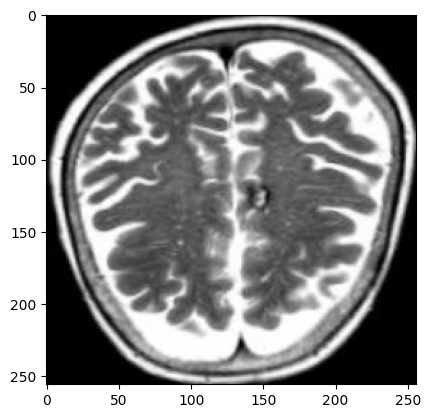

In [91]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 1.3 Load Data
In our dataset, we have our data already split into training, validation and testing data. Each of these splits has the corresponding diagnosis of 'Normal' or 'Tumor'. Here we will load them into different data pipelines. Note, if you download the dataset from Kaggle directly then you may need to move and rename some folders to get replicate the code here. In order to avoid confusion, download the data folder ('data.zip') from the coressponding Github repo: https://github.com/Shreya-Das-uoft/MRI-Image-Classifier. 

In [92]:
import numpy as np
from matplotlib import pyplot as plt

In [93]:
# Training data 
data_train = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Train'))

Found 320 files belonging to 2 classes.


You can check if the data was imported correctly by counting the number of files in the Train folder. There are 136 files labelled 'Normal' and 184 files labelled 'Tumor'. This confirms that the 'Train' folder was imported correctly.

In [94]:
# Validation data
data_validation = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Validation'))

Found 80 files belonging to 2 classes.


In [95]:
# Testing data
data_test = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Testing'))

Found 400 files belonging to 2 classes.


In order to loop through the data pipeline that we have imported here, we can use a numpy iterator. The numpy iterator allows us to iterate over different batches of the data pipeline.

We will only do this for the training data pipeline, since we don't need to iterate over the entire data pipeline for the rest of this project.

In [96]:
# Creating the numpy iterator from the train data pipeline
data_iterator_train = data_train.as_numpy_iterator()

In [97]:
# Getting a batch from the train data pipeline
batch = data_iterator_train.next()

In [98]:
batch[0].shape

(32, 256, 256, 3)

32 represents the number of images in this batch. (256, 256) represents the size of the image. 3 represents that these images are colored.

In [99]:
batch[1]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

The series of 1s and 0s represents the different classes that the images are classified under; so 'Normal' or 'Tumor'. In order to figure which number represents which class, we are going to display the figure with the label.

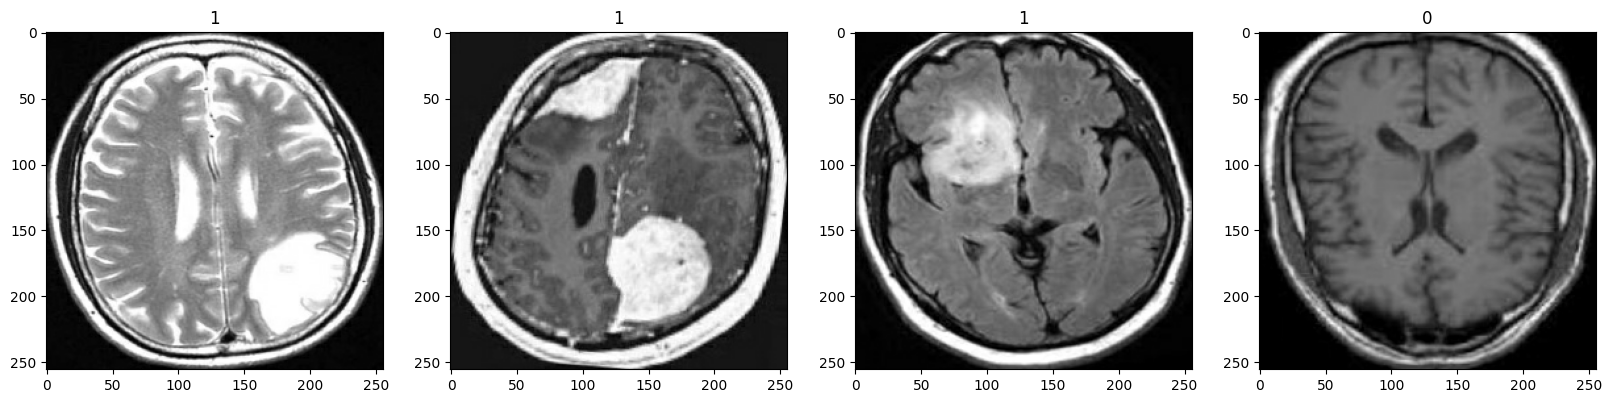

In [100]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

We see that here 0 represents 'Normal' and 1 represents 'Tumor'.

## 2 Data pre-processing
When we are working with image data, we need to scale the images between ranges of 0 and 1 for several reasons including preventing exploding or vanishing gradients during model training, bias towards larger values, and ensuring consistency over datasets.

### 2.1 Scaling
Here, we need to scale our data from 0-255 to 0-1. We can do this by dividing by 255 in order to get the scaled data. Now we want to make sure that as we are loading data into the data pipeline, that this scaling process (transformation) is occuring too. We can do this using a keras method called tf.map().

In [101]:
# Training data
data_train = data_train.map(lambda x, y: (x/255, y))

# Validation data
data_validation = data_validation.map(lambda x, y: (x/255, y))

# Testing data
data_test = data_test.map(lambda x, y: (x/255, y))

Now we are going to check if the data was transformed using the numpy iterator method.

In [102]:
# Creating the numpy iterator from the train data pipeline
data_iterator_valid = data_validation.as_numpy_iterator()

In [109]:
# Getting a batch from the train data pipeline
batch = data_iterator_valid.next()

In [110]:
batch[0].max()

np.float32(1.0)

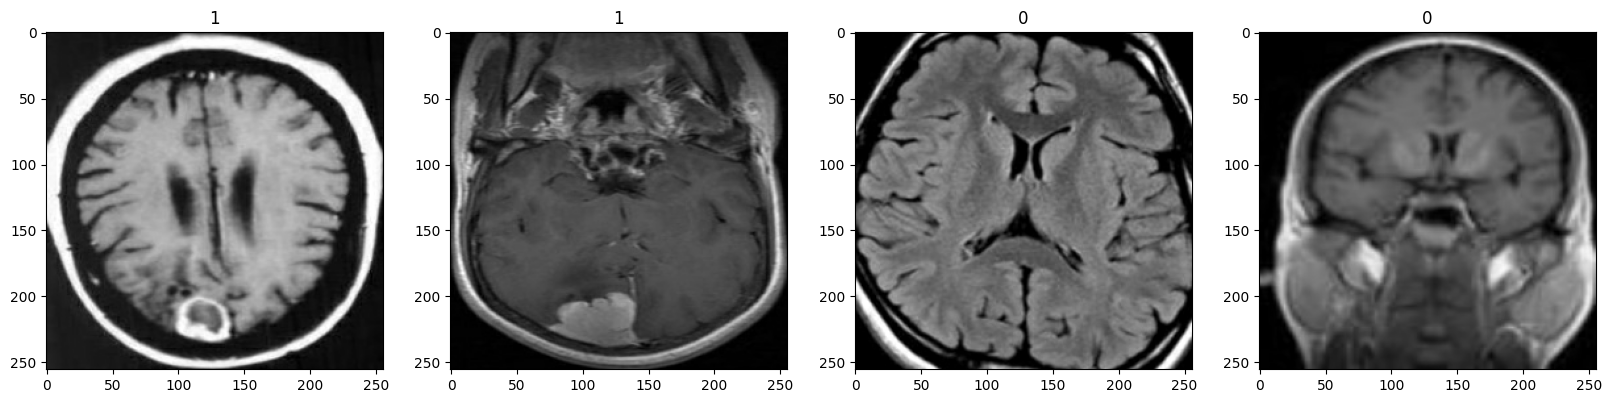

In [111]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data
As mentioned before, this dataset has already been split into training. validation and testing data. However, when we look at the ratio of the data splits we see that 40% of the data is training, 10% is validation, and 50% is testing data. This is not the recommended data splits, rather we should have 60-80% training data, 10-20% validation and 10-20% test data. Thus, we will need to do some manipulation to get these splits. We will aim for 70:20:10 for our data split.

In [115]:
# Concatenate the MapDatasets first
ds = data_train.concatenate(data_validation)

In [116]:
data = ds.concatenate(data_test)

In [118]:
len(data)

26

We have 26 batches in our entire dataset. We need to make sure that the number of batches for training, validation, and testing all add up to 26 batches.

In [127]:
# Then we split the data into training, validation, and testing data
train_size = int(len(data)*0.7) # 70% training
val_size = int(len(data)*0.2) # 20% validation
test_size = int(len(data)*0.1) + 1 # 10% testing

In [129]:
train_size + val_size + test_size

26

Here, we add 1 to the test_size to ensure that we have 3 batches allocated to the test data since 26 * 0.1 = 2.6 (the int function would round this down to 2).

Next, we need to actually split the data using these data batch sizes.

In [130]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 3. Export the Data for CNN Model Building
We are going to export the data for the next phase of this project. We will 